In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import networkx as nx
import math
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [26]:
"""
collatz.py is a helper file that contains the following functions that build back-bone of our analysis.
"""
from collatz import collatz, collatzpath, collatzpath_to_dictionary, place, graph_unit_place, graph_for_numbers

The wave-like pattern that is generated when we try to plot the number of iterations required for
every number from 1 to 1000, is the most intriguing plot displaying the complexity of collatz conjecture.
In the analysis, I have tried to generate my own graph to try and come up with new patterns that result
out of principle of collatz conojecture.

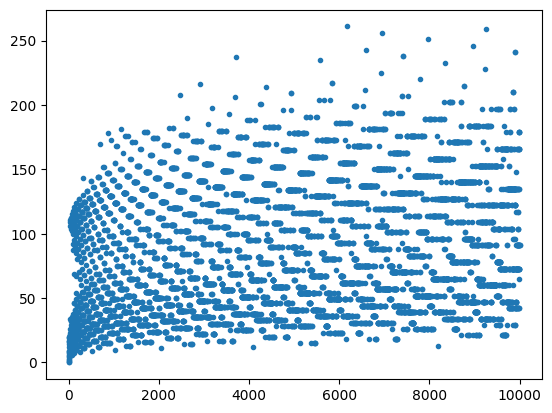

In [27]:
collatzCounts = [collatz(i) for i in range(10000)]
plt.plot(collatzCounts,'.')

Before we get to the analysis, let's get to know a little about the visualization library that is
used throughout. Networkx is a library that allows the users to visualize complex networks and graphs.
It processes input data in the node-edge form which can be graphed in multiple ways using layouts
that are readily available. The functions in the helper file named graph_for_numbers, graph_unit_place
converts the synthesized collatz data into the format required as input by networkx library. 

Let's start with graphing something simple. The visualization below plots the collatzpath for numbers
10 to 15 using networkx, this particular range is deliberately chosen to set stage for the overall idea of this analysis. To know more about the functions used, refer to the helper file mentioned above.
This graph shows how once a particular number is encountered in the path, rest of the path follows obvious
pattern.

C:\Users\13134\AppData\Local\Temp\ipykernel_25744\3016481522.py:6: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(A, prog="dot")


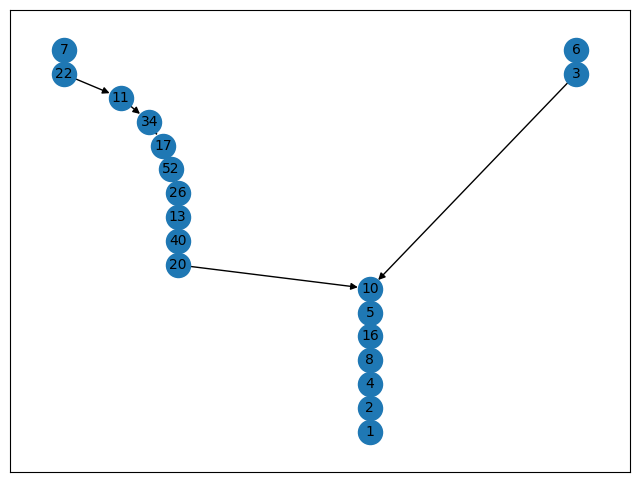

In [19]:
A = nx.MultiDiGraph()

A.add_weighted_edges_from(graph_for_numbers(10,15))

plt.figure(figsize=(8,6))
pos = graphviz_layout(A, prog="dot")
nx.draw_networkx_nodes(A, pos, node_size=300)
nx.draw_networkx_labels(A, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edges(A, pos,width=1.0, edge_cmap=plt.cm.Blues)

plt.show()

Below is a graph for collatzpath 64 to 67, and we can clearly see the pattern here as well.

C:\Users\13134\AppData\Local\Temp\ipykernel_25744\164390885.py:6: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(A, prog="dot")


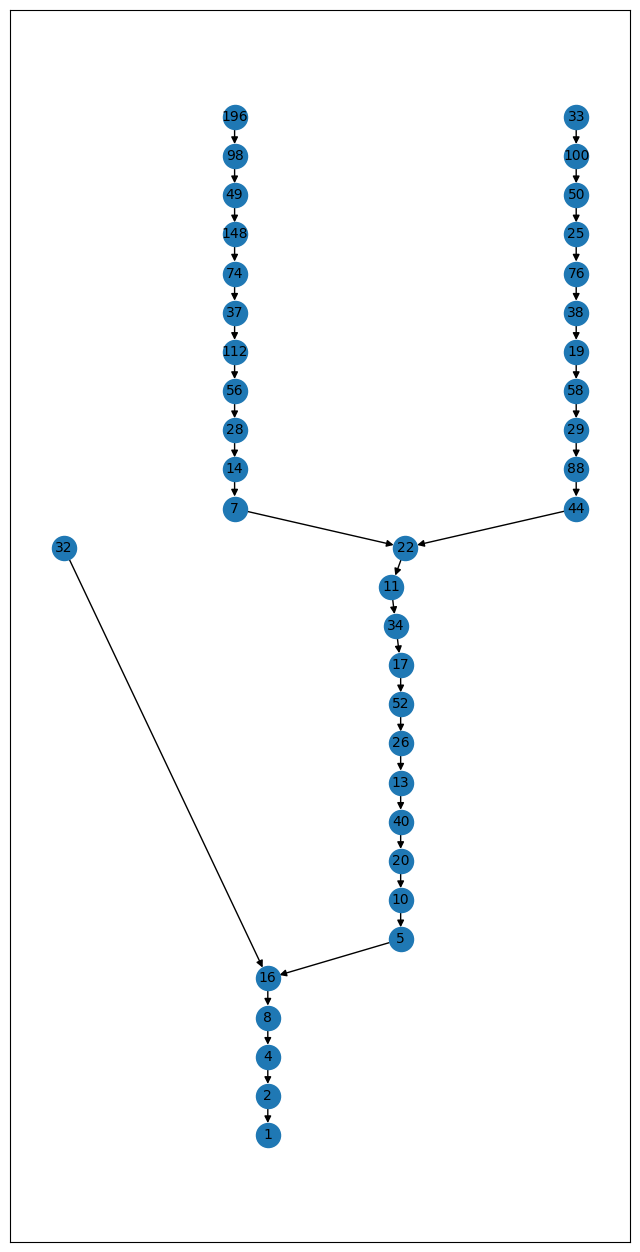

In [20]:
A = nx.MultiDiGraph()

A.add_weighted_edges_from(graph_for_numbers(64,67))

plt.figure(figsize=(8,16))
pos = graphviz_layout(A, prog="dot")
nx.draw_networkx_nodes(A, pos, node_size=300)
nx.draw_networkx_labels(A, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edges(A, pos,width=1.0, edge_cmap=plt.cm.Blues)


plt.show()

Lets try to get intersecting nodes between two graphs. This will help us
get closer in our attempts to compare.

C:\Users\13134\AppData\Local\Temp\ipykernel_25744\1463227283.py:15: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(R, prog="dot")


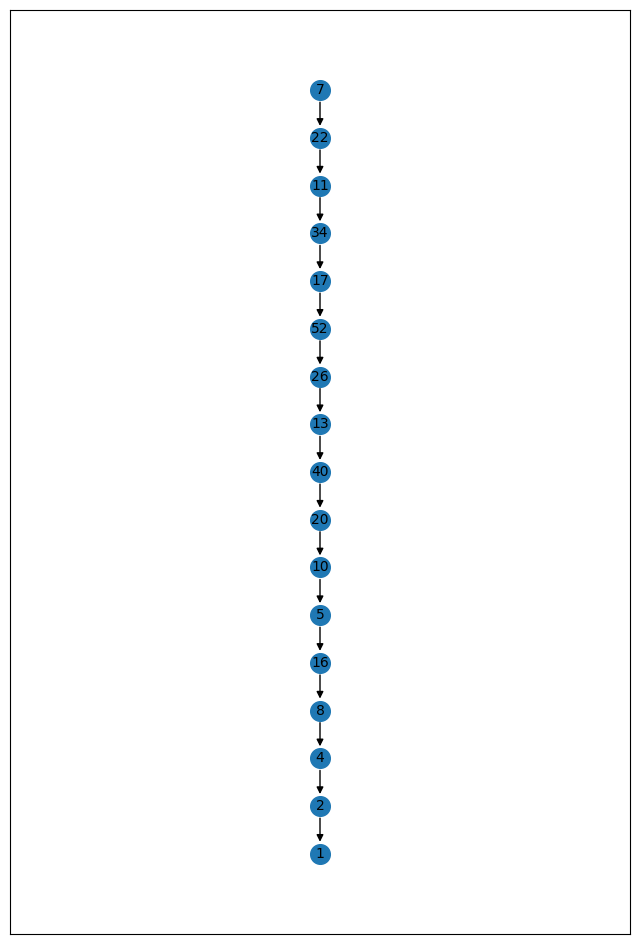

In [ ]:
A = nx.MultiDiGraph()
B = nx.MultiDiGraph()

A.add_weighted_edges_from(graph_for_numbers(10,15))
B.add_weighted_edges_from(graph_for_numbers(64,67))
R = nx.intersection(A, B)

plt.figure(figsize=(8,12))
pos = nx.spring_layout(R,seed=700)
pos = graphviz_layout(R, prog="dot")
nx.draw_networkx_nodes(R, pos, node_size=200)
nx.draw_networkx_labels(R, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edges(R, pos,width=1.0, edge_cmap=plt.cm.Blues)
plt.show()

The R graph above gives intersecting nodes for A and B.
Now that we know how it works lets go ahead and gets intersecting nodes between two graphs below

C:\Users\13134\AppData\Local\Temp\ipykernel_25744\2312264008.py:9: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(R, prog="dot")


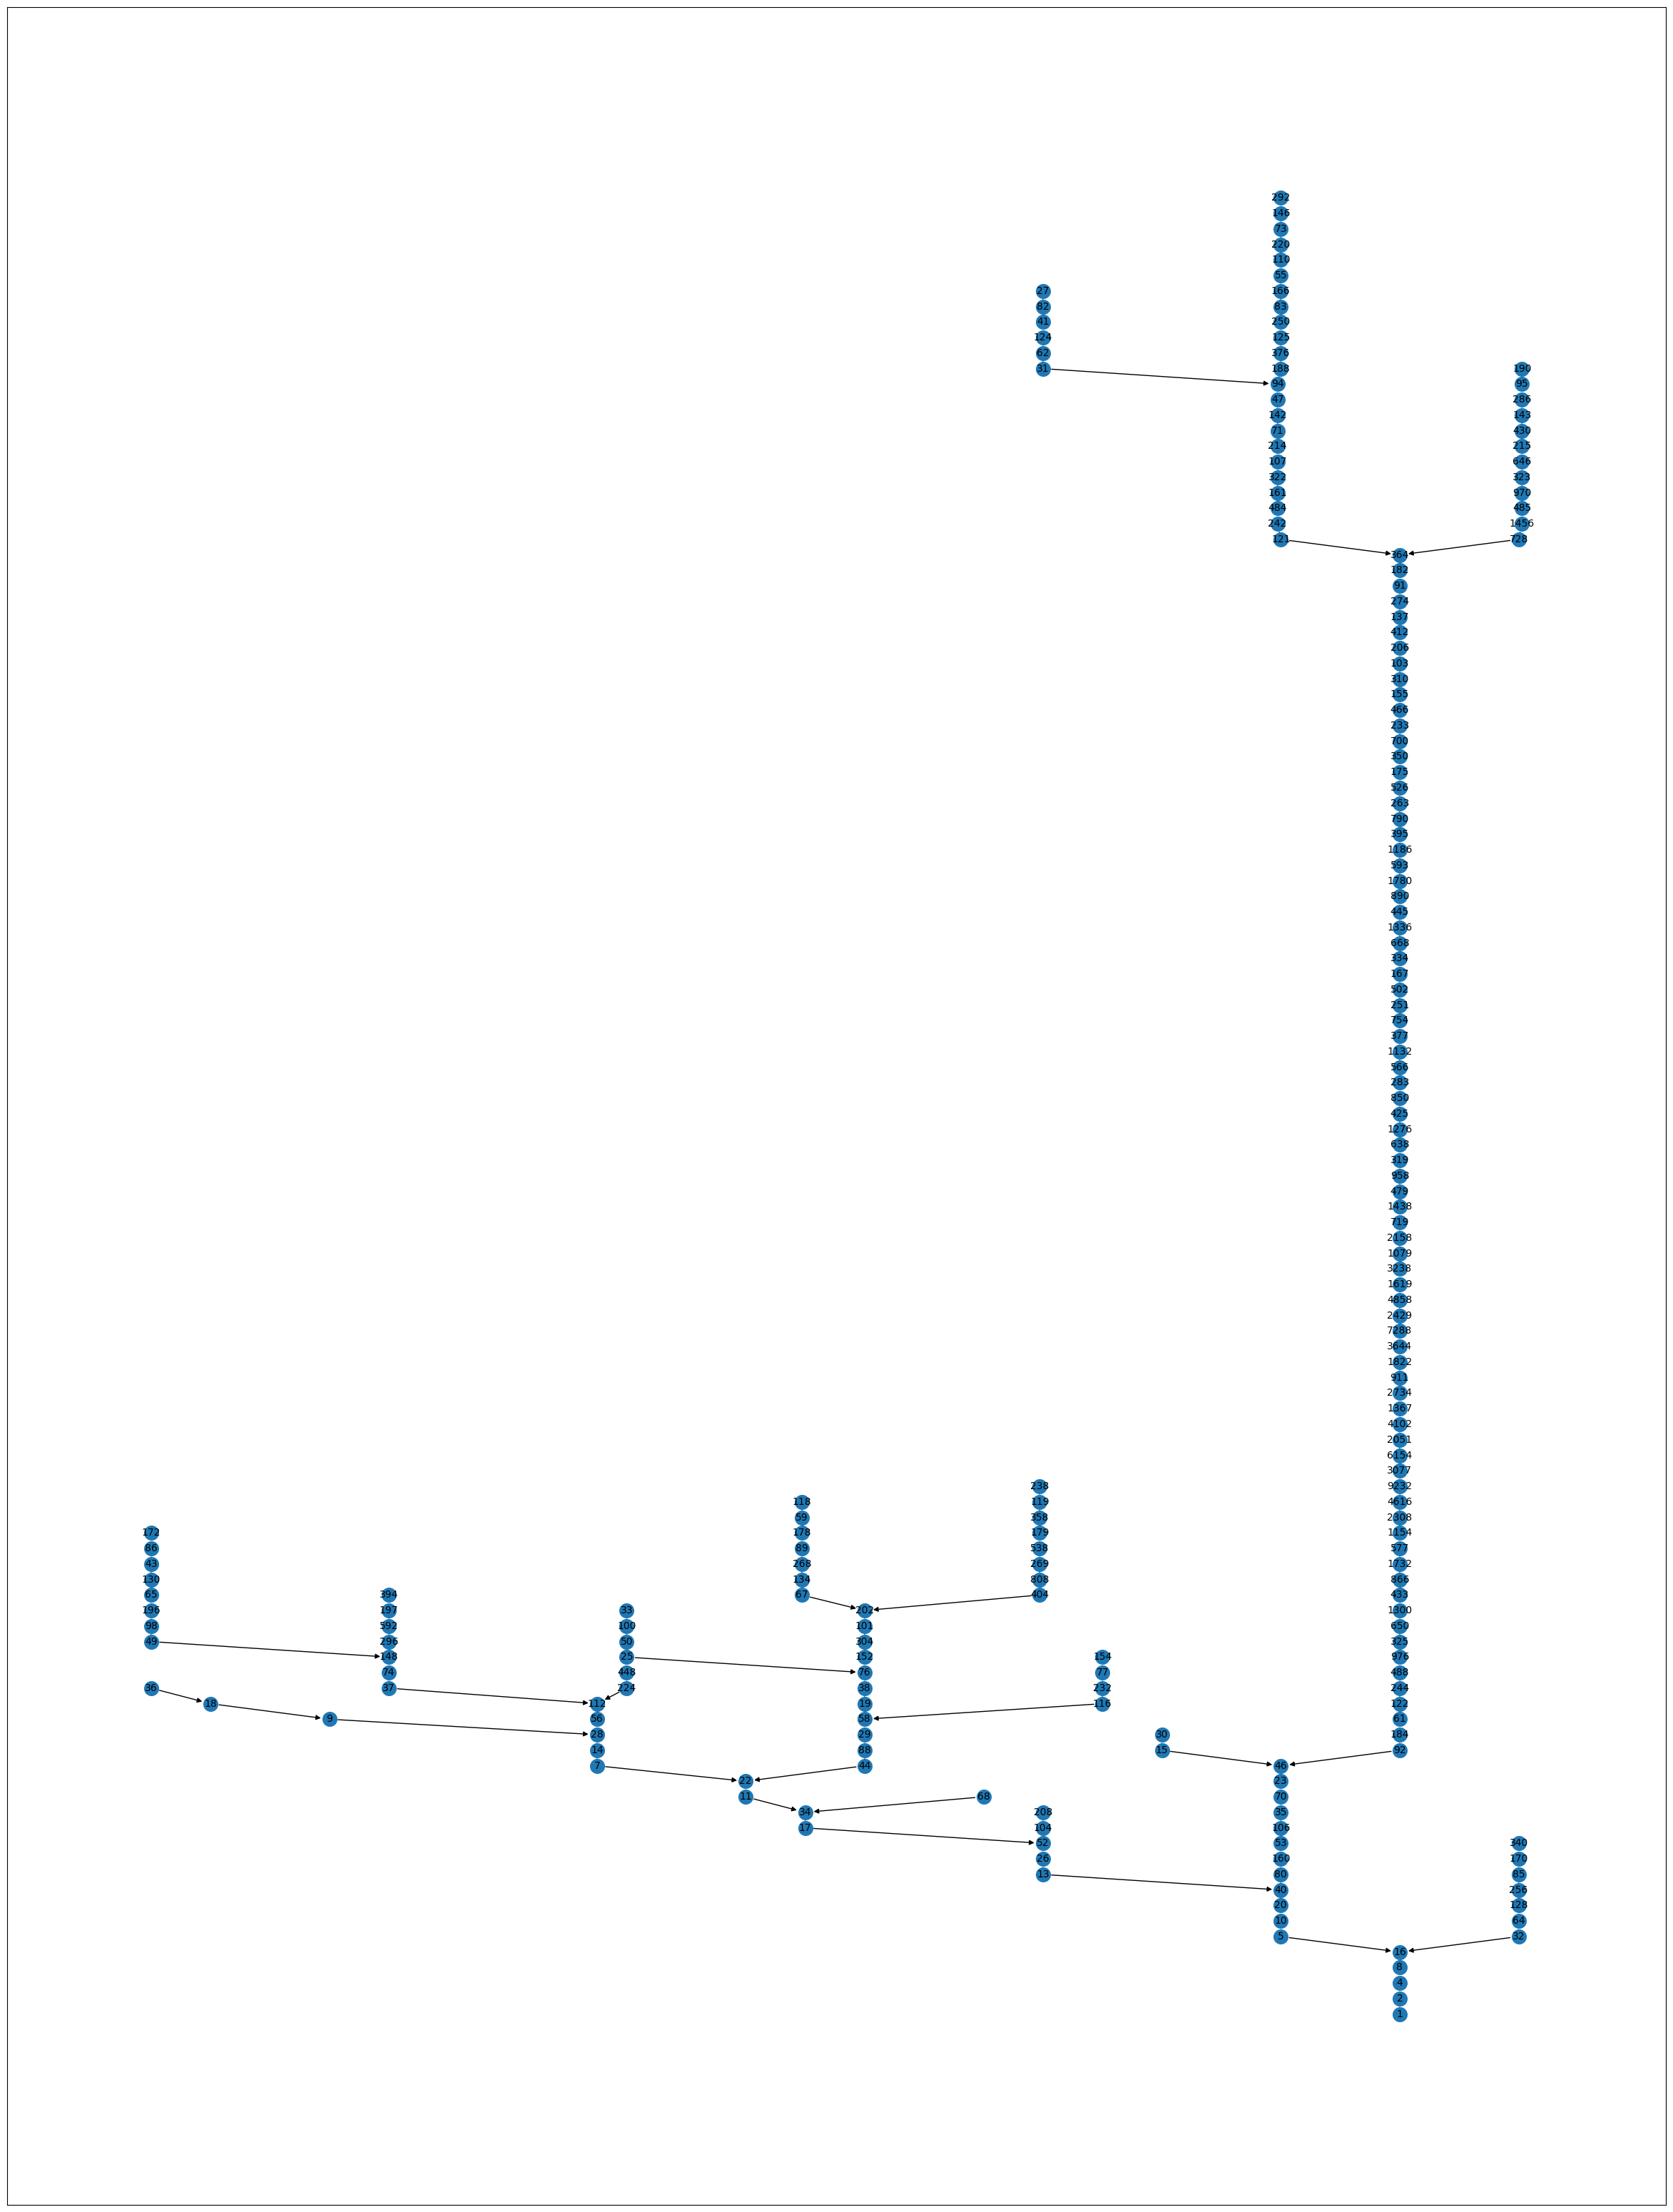

In [ ]:
A = nx.MultiDiGraph()
B = nx.MultiDiGraph()
A.add_weighted_edges_from(graph_for_numbers(2,100))
B.add_weighted_edges_from(graph_for_numbers(100,150))

R = nx.intersection(A, B)
plt.figure(figsize=(30,40))
pos = graphviz_layout(R, prog="dot")
nx.draw_networkx_nodes(R, pos, node_size=200)
nx.draw_networkx_labels(R, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edges(R, pos,width=1.0, edge_cmap=plt.cm.Blues)
plt.show()

Below is an attempt to dive further into capabilities of networkx and analyze the pattern in a different way.

We see an interesting pattern that is so obvious once a particular number is encountered in a path.
We plotted two networkx graphs and differentiated them with color of the edges. The intensity of the color
represent number of times the path occured in the range. This gives a complex graph where we are able to see
how different range of numbers collide paths with each other.

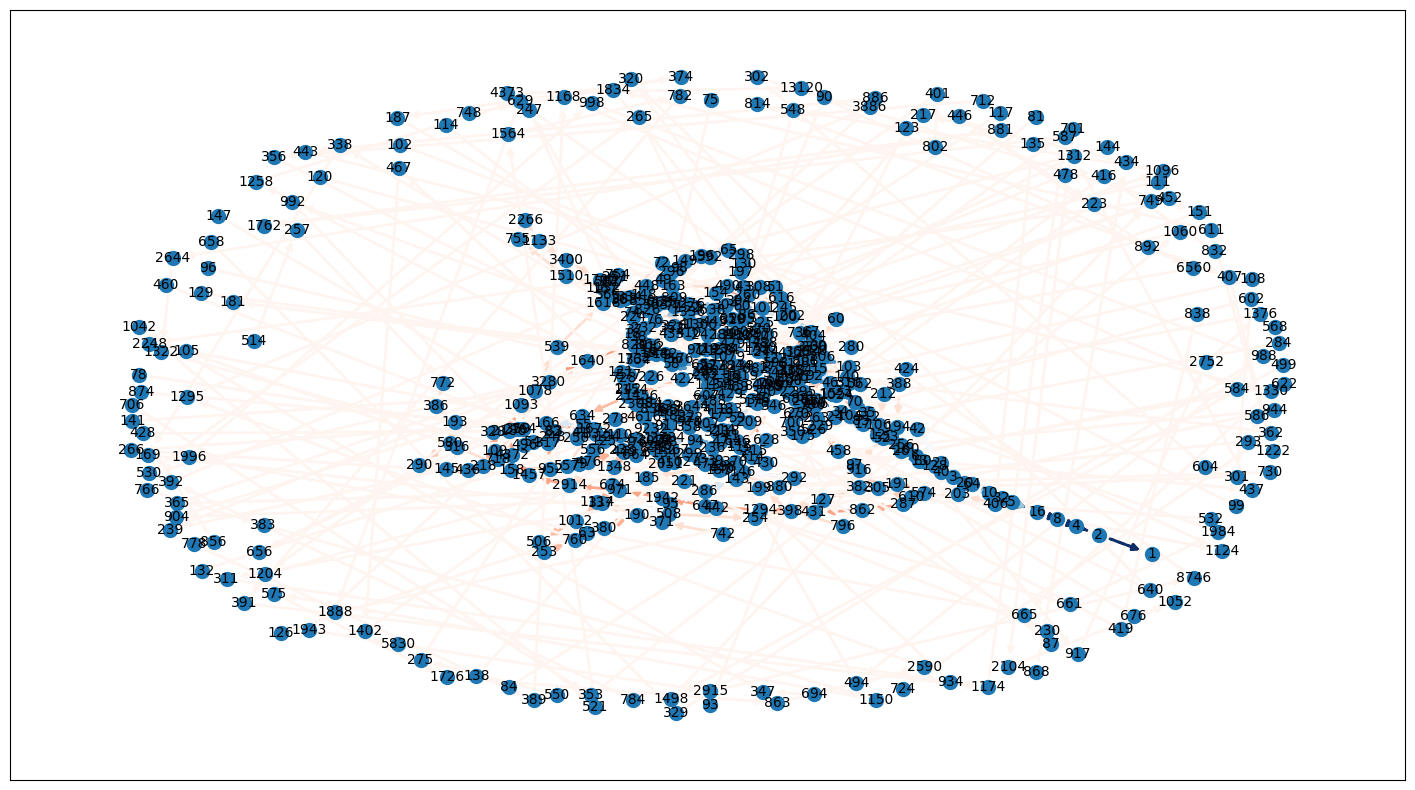

In [ ]:
WG = nx.MultiDiGraph()

WG.add_weighted_edges_from(graph_for_numbers(2,100))
WG.add_weighted_edges_from(graph_for_numbers(100,150))

elist1 = [(u, v) for (u, v, d) in graph_for_numbers(2,100)]
elist2 = [(u, v) for (u, v, d) in graph_for_numbers(100,150)]
d1 = [d for (u, v, d) in graph_for_numbers(2,100)]
d2  = [d for (u, v, d) in graph_for_numbers(100,150)]
plt.figure(figsize=(18,10))

pos = nx.spring_layout(WG,seed=700)
nx.draw_networkx_nodes(WG, pos, node_size=100)
nx.draw_networkx_labels(WG, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edges(WG, pos, edgelist=elist1,width=2.0,edge_color=d1, edge_cmap=plt.cm.Reds)
nx.draw_networkx_edges(WG, pos, edgelist=elist2,width=2.0,edge_color=d2, edge_cmap=plt.cm.Blues)

plt.show()


Let's merge the two ways we visualized the graph and see what we get :)

So intersection graph that we got in the second-last visual above excludes the weights of the edges. So all we get is just the nodes. Lets use these nodes to plot a subgraph of the complex graph we just plotted.

Getting all the nodes from the intersection and then plotting subgraph of wg with only those nodes

In [ ]:
all_nodes = list(R.nodes)

def filter_node(n1):
    return [n1 for n1 in all_nodes]

C:\Users\13134\AppData\Local\Temp\ipykernel_25744\648532614.py:4: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(view, prog="dot")


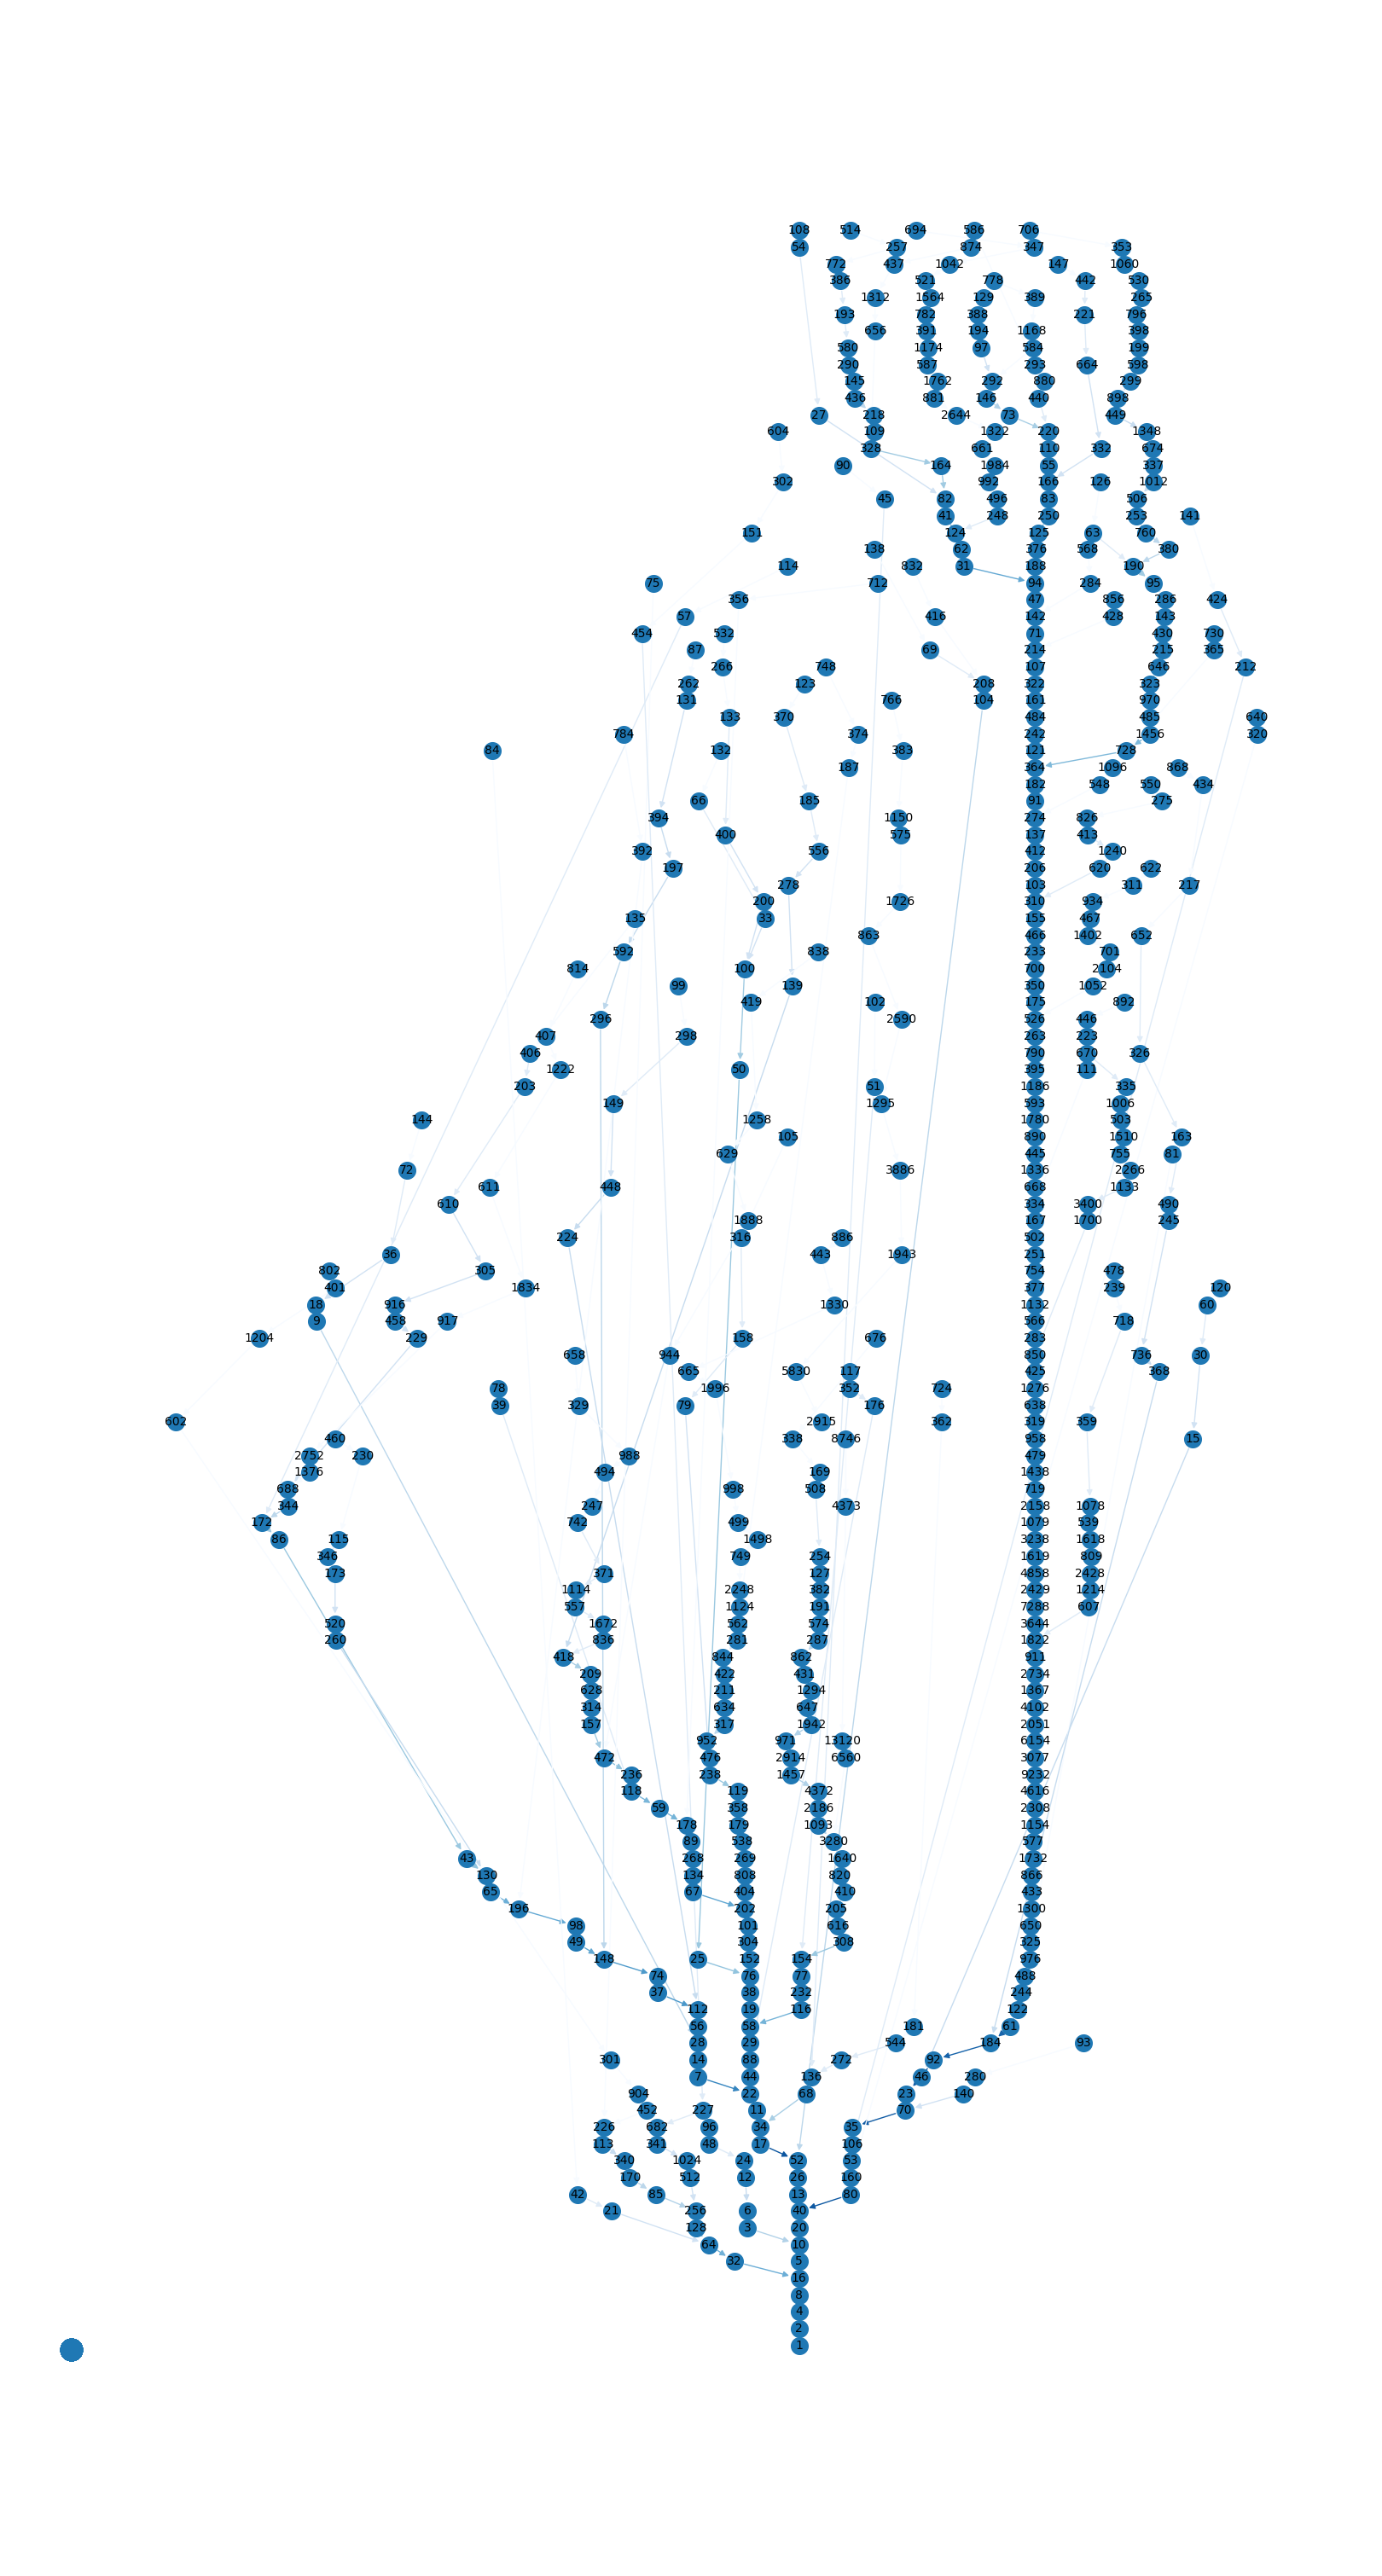

In [ ]:
plt.figure(figsize=(16,30))
view = nx.subgraph_view(WG, filter_node = filter_node)
nx.draw(view)
pos = graphviz_layout(view, prog="dot")
nx.draw_networkx_nodes(view,pos=pos, node_size=200)
nx.draw_networkx_labels(view, pos, font_size=10, font_family="sans-serif")
nx.draw_networkx_edges(view, pos,width=1.0,edgelist=elist1,edge_color=d1, edge_cmap=plt.cm.Blues)
plt.show()

Now we not just got the intersecting nodes but also how often they occur which is denoted by the intensity
of the edge color.